In [2]:
import numpy as np
import matplotlib.pyplot as plt

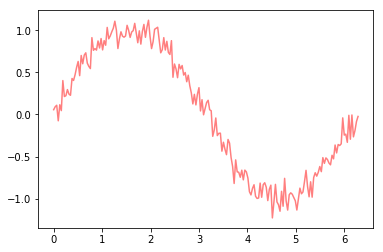

In [43]:
N=200
X=np.linspace(0,2*np.pi,num=N).reshape(N,1)
y=np.sin(X)+np.random.normal(0,0.1,(N,1))

plt.plot(X,y,color='red',alpha=0.5)
plt.show()

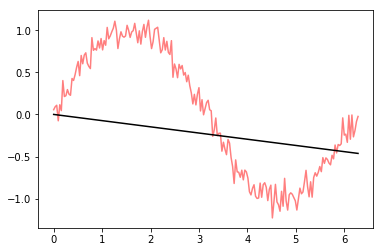

In [44]:
def linear_kernel(X):
    K=np.matmul(X,np.transpose(X))
    return K

K=linear_kernel(X)

sz=K.shape[0]
lamda=0.1
y_pred=[]
for i in range(N):
    al=np.matmul(np.linalg.inv(K+lamda*np.identity(sz)),y.reshape(sz,1))
    y_pred.append(np.matmul(np.transpose(al),K[i,:].reshape(sz,1)))
y_pred=np.array(y_pred).reshape(N,1)
plt.plot(X,y,color='red',alpha=0.5)
plt.plot(X,y_pred,color='black',alpha=1)
plt.show()

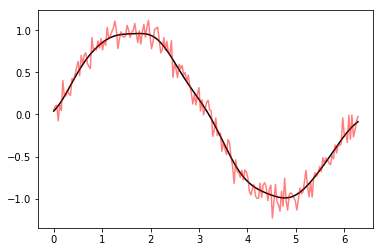

In [45]:
def nonlinear_kernel(X,gamma=3):
    K=np.zeros((len(X),len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            K[i,j]=np.exp(-gamma*np.linalg.norm(X[i]-X[j])**2)

    return K

K=nonlinear_kernel(X)
lamda=0.5
sz=K.shape[0]
y_pred=[]
for i in range(len(X)):
    al=np.matmul(np.linalg.inv(K+lamda*np.identity(sz)),y.reshape(sz,1))
    y_pred.append(np.matmul(np.transpose(al),K[i,:].reshape(sz,1)))

y_pred=np.array(y_pred).reshape(N,1)
plt.plot(X,y_pred,color='black',alpha=1)
plt.plot(X,y,color='red',alpha=0.5)
plt.show()